### Statistical Thinking for Data Science - Spring 2023
# --------------------------------------------------------
### Topic : A Data-Driven Dive into Heart Heath
### Group: 15
### **Group Members (in alphabetic order)**
#### 1. Able Varghese | ID: 24712198
#### 2. Anik Mahamood | ID: 24704052
#### 3. Hassan Iqbal | ID: 24887806
#### 4. Lisa D’Cruz | ID: 25046451
#### 5. Rony Debnath | ID: 24712729
# --------------------------------------------------------

# Importing Necessary Libraries


In [277]:
import pandas as pd
import numpy as np
import altair as alt
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix , classification_report
!pip install mlxtend
from mlxtend.plotting import plot_confusion_matrix
from sklearn.model_selection import KFold , cross_val_score
from sklearn.model_selection import GridSearchCV

# Loading the dataset


In [278]:
url = "https://raw.githubusercontent.com/ronydebnath/STDS-15/main/Dataset/heart_2020_cleaned.csv?token=GHSAT0AAAAAACHSU2OQOR67NPLGHE3UPBIIZIJGDTA"
df = pd.read_csv(url)
# Create a copy of the dataset
df_inspect = df.copy()

# General info about the dataset


In [279]:
df.head()


,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [280]:
df.shape

(319795, 18)

In [281]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

There is no null object in our dataset

# Check for any missing values

In [282]:
df.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [283]:
# checking the duplicate
df.duplicated().sum()

18078

In [284]:
# General description about our dataset
df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


In [285]:
df['AgeCategory'].value_counts()

65-69          34151
60-64          33686
70-74          31065
55-59          29757
50-54          25382
80 or older    24153
45-49          21791
75-79          21482
18-24          21064
40-44          21006
35-39          20550
30-34          18753
25-29          16955
Name: AgeCategory, dtype: int64

# Data Exploration

In [286]:
# Get descriptive statistics of numerical variables
df_inspect.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


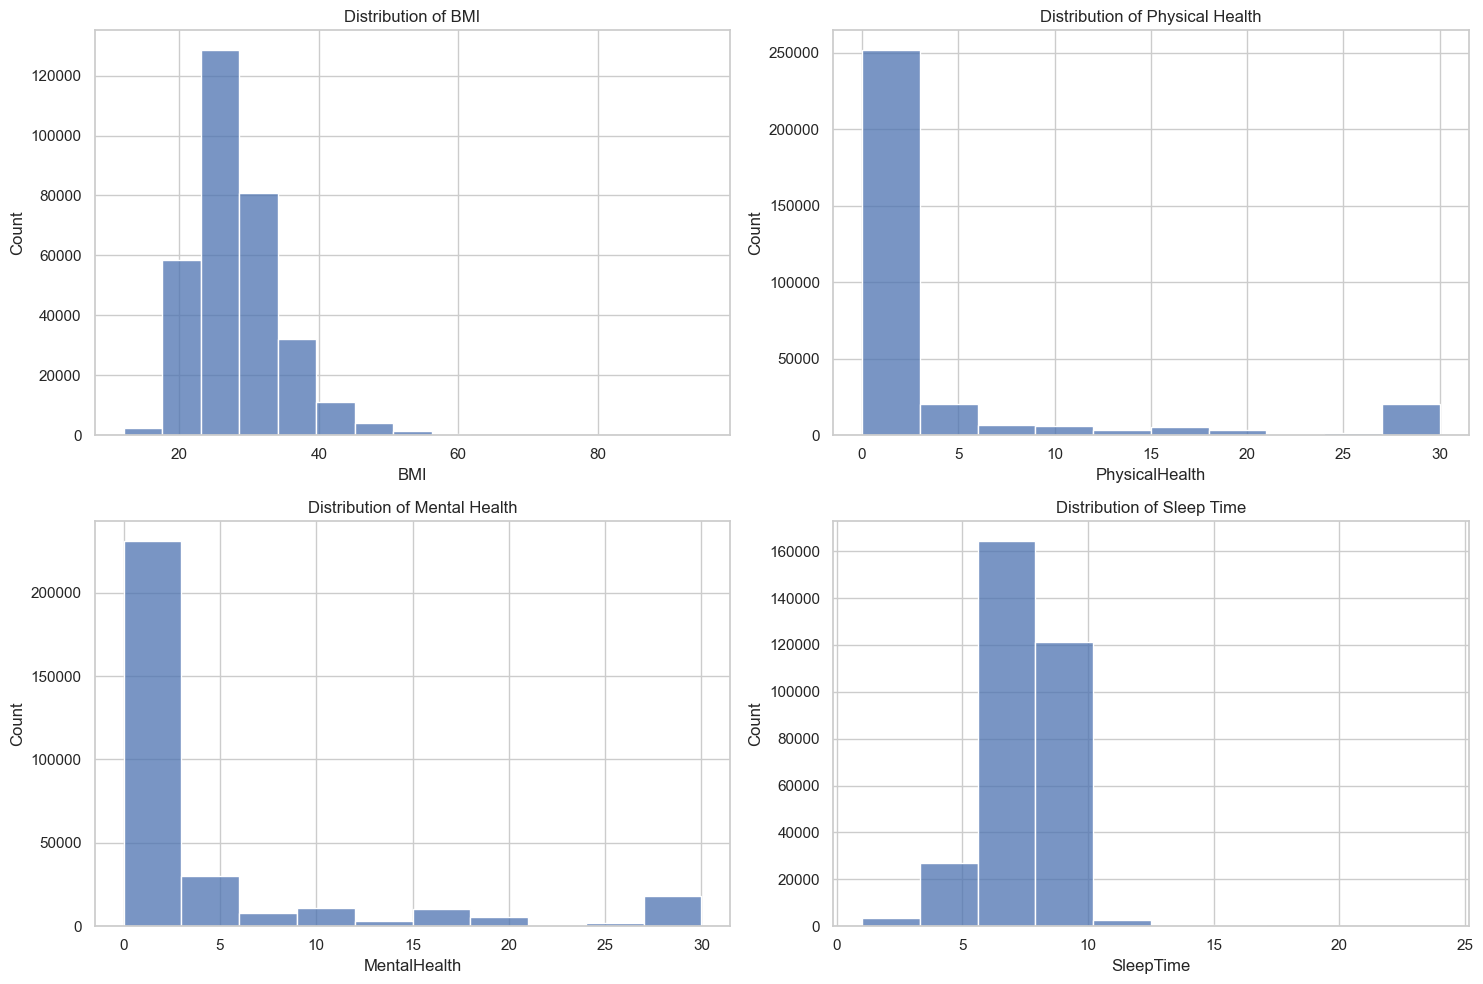

In [287]:
# Inspect the numerical variables
# Setup the style and figure size
# histplot is suitable for numerical variables

sns.set(style='whitegrid')
plt.figure(figsize=(15, 10))

# BMI
plt.subplot(2, 2, 1)
sns.histplot(df_inspect['BMI'], kde=False, bins=15)
plt.title('Distribution of BMI')

# PhysicalHealth
plt.subplot(2, 2, 2)
sns.histplot(df_inspect['PhysicalHealth'], kde=False, bins=10)
plt.title('Distribution of Physical Health')

# MentalHealth
plt.subplot(2, 2, 3)
sns.histplot(df_inspect['MentalHealth'], kde=False, bins=10)
plt.title('Distribution of Mental Health')

# SleepTime
plt.subplot(2, 2, 4)
sns.histplot(df_inspect['SleepTime'], kde=False, bins=10)
plt.title('Distribution of Sleep Time')

# Adjust layout to ensure no overlapping
plt.tight_layout()
plt.show()


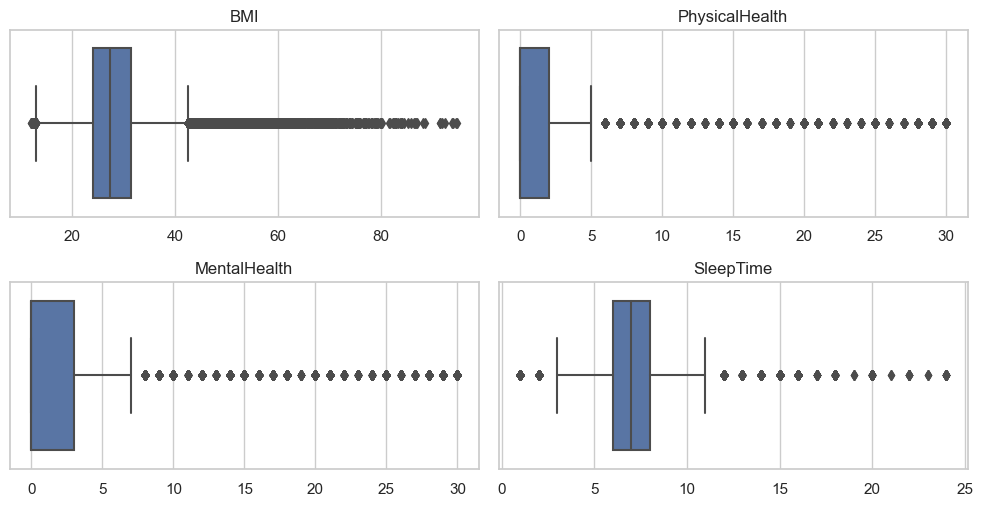

In [288]:
# Check for outliers
# Define the numerical_variables list
numerical_variables = ['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']


# Set up the figure and axes
plt.figure(figsize=(10, 10))
sns.set(style="whitegrid")

# Loop through each numerical column and create a box plot for each variable
for i, col in enumerate(numerical_variables, 1):
    plt.subplot(4, 2, i)
    sns.boxplot(x=df_inspect[col])
    plt.title(col)
    plt.xlabel('')

plt.tight_layout()
plt.show()

Unique values of HeartDisease:
['No' 'Yes']


Unique values of Smoking:
['Yes' 'No']


Unique values of AlcoholDrinking:
['No' 'Yes']


Unique values of Stroke:
['No' 'Yes']


Unique values of DiffWalking:
['No' 'Yes']


Unique values of Sex:
['Female' 'Male']


Unique values of AgeCategory:
['55-59' '80 or older' '65-69' '75-79' '40-44' '70-74' '60-64' '50-54'
 '45-49' '18-24' '35-39' '30-34' '25-29']


Unique values of Race:
['White' 'Black' 'Asian' 'American Indian/Alaskan Native' 'Other'
 'Hispanic']


Unique values of Diabetic:
['Yes' 'No' 'No, borderline diabetes' 'Yes (during pregnancy)']


Unique values of PhysicalActivity:
['Yes' 'No']


Unique values of GenHealth:
['Very good' 'Fair' 'Good' 'Poor' 'Excellent']


Unique values of Asthma:
['Yes' 'No']


Unique values of KidneyDisease:
['No' 'Yes']


Unique values of SkinCancer:
['Yes' 'No']




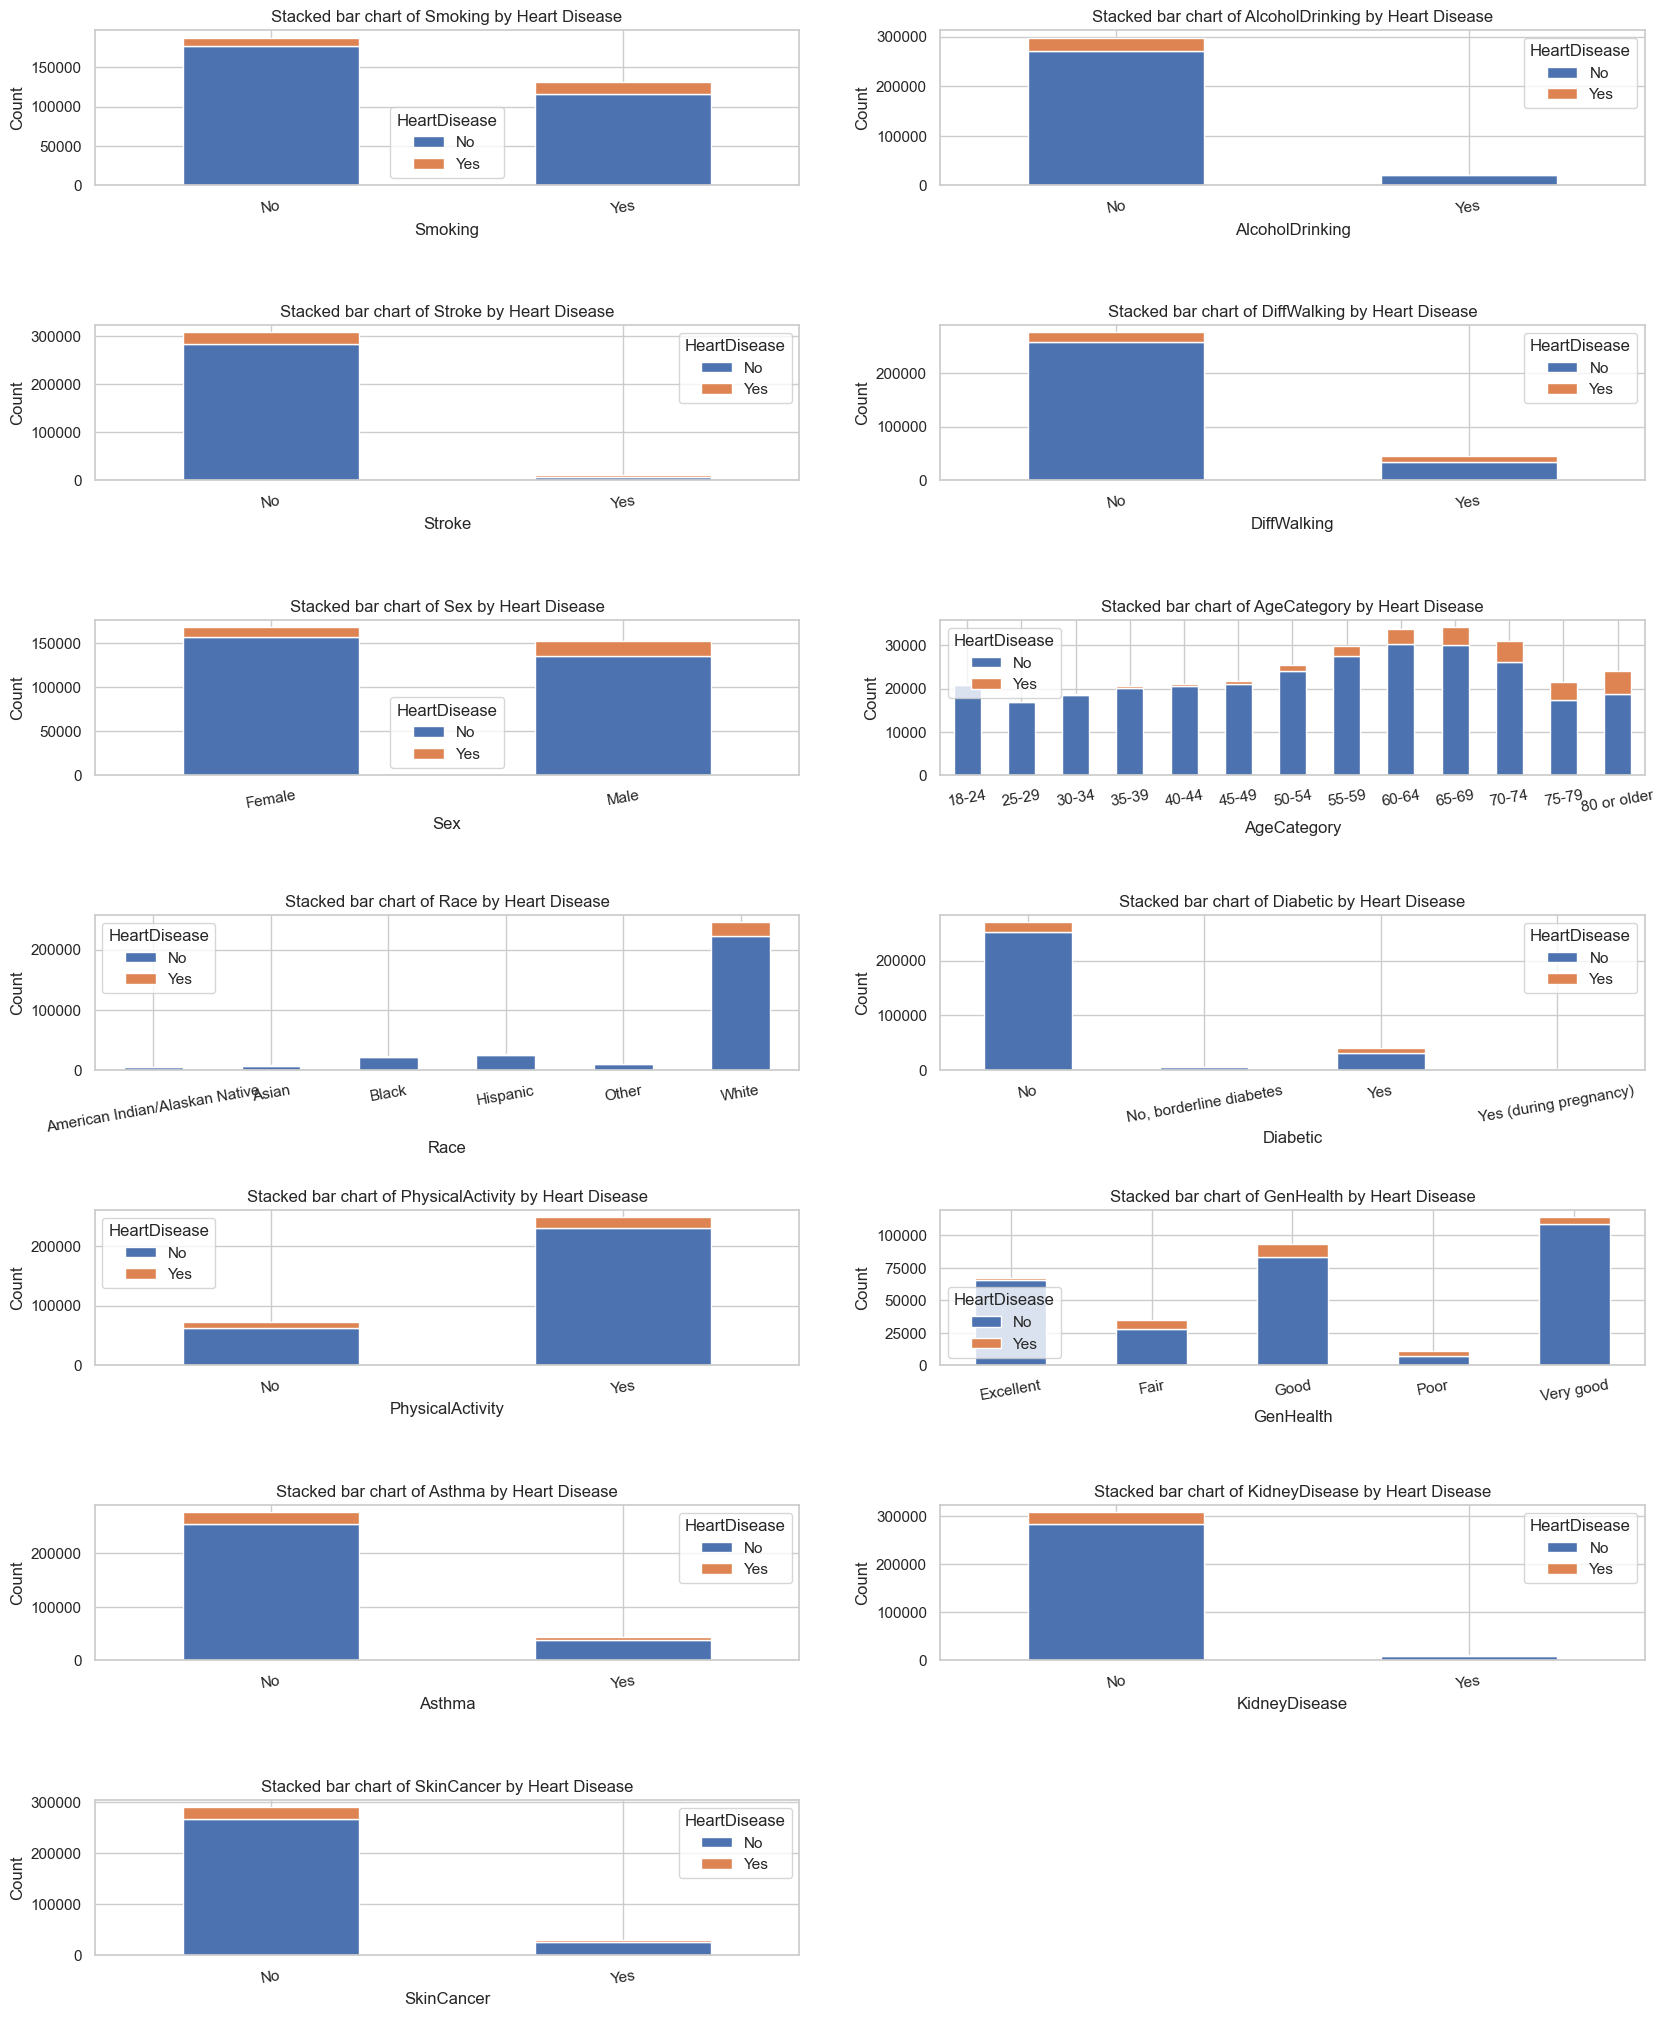

In [289]:
# Define the categorical_variables list
categorical_variables = ['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke',
                         'DiffWalking', 'Sex', 'AgeCategory', 'Race', 'Diabetic',
                         'PhysicalActivity', 'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer']

# Print unique values for each categorical variable
for feature in categorical_variables:
    print(f'Unique values of {feature}:')
    print(df_inspect[feature].unique())
    print('\n')

# Remove target variable
categorical_variables.remove('HeartDisease')

categorical_variables

# Set up the matplotlib figure
# Adjust the vertical space between the stacked bar charts
plt.figure(figsize=(20, 25))

# Plot stacked bar charts for each categorical variable against target variable, heart disease
# the x-axis labels are rotated and more vertical space added to improve legibility
for i, col in enumerate(categorical_variables, 1):
    plt.subplot(7, 2, i)

    # Count the occurrences of each category grouped by target variable, heart disease
    grouped_data = df_inspect.groupby(['HeartDisease', col]).size().unstack(level=0)

    # Plot the stacked bar chart
    grouped_data.plot(kind='bar', stacked=True, ax=plt.gca())
    plt.title(f"Stacked bar chart of {col} by Heart Disease")
    plt.ylabel('Count')
    plt.xticks(rotation=10)  # Rotate x-axis labels to 10 degrees

# Adjust vertical space
plt.subplots_adjust(hspace=0.9)

plt.show()



# The questions that we tried to answer from this dataset in Phase 2B:

### Risk Factors for Heart Disease:

 - Which factors (like BMI, Smoking, Alcohol Drinking, etc.) are most closely associated with respondents reporting heart disease?

### Behavioural Insights:
 - Is there a significant difference in the likelihood of heart disease between smokers and non-smokers?
- Do heavy drinkers have a higher incidence of heart disease compared to non-drinkers or moderate drinkers?

### Demographic Disparities:
 - Are there differences in the reporting of heart disease across different age categories or racial/ethnic groups?
 - Is the prevalence of heart disease different between males and females?

### Mental and Physical Health Link:
 - Is there a correlation between the number of days of poor mental health reported and the incidence of heart disease?
 - How does the number of days of poor physical health correlate with heart disease?

### Lifestyle and Health:
 - Is there a relationship between physical activity and the likelihood of reporting heart disease?
 - How does average sleep time relate to heart disease risk?

### Co-existing Health Conditions:
 - Is there a higher prevalence of heart disease in respondents who also report diabetes, stroke, or kidney disease?

### Health Perception and Reality:
 - How do respondents with heart disease rate their general health compared to those without heart disease?

### Mobility and Heart Disease:
 - Is there a significant difference in the reporting of difficulty in walking or climbing stairs between respondents with and without heart disease?

### Cancer and Heart Disease Link:
 - Is there a higher prevalence of heart disease in respondents who have reported having skin cancer?

### Health Education/Outreach Opportunity:
 - Based on the data, which demographic or behavioural groups might benefit most from heart health awareness campaigns or interventions?


# Business Question 1
# ----------------------------------------
# Risk Factors for Heart Disease
# ----------------------------------------

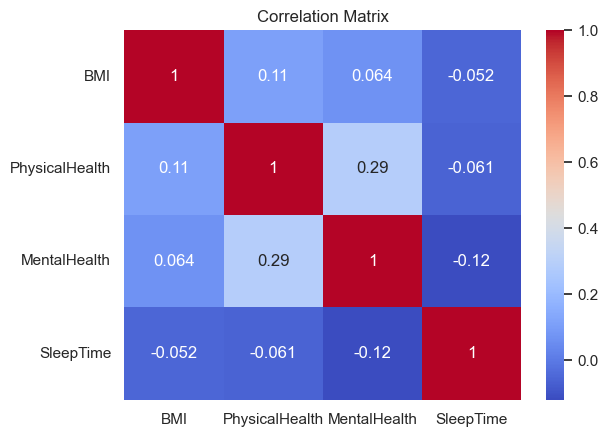

In [290]:
# Correlation matrix to see how each feature relates to HeartDisease
correlation = df.corr()
sns.heatmap(correlation, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

# Business Question 2
# --------------------------------------------------------
# Behavioral Insights: Smoking and Alcohol Consumption
# --------------------------------------------------------

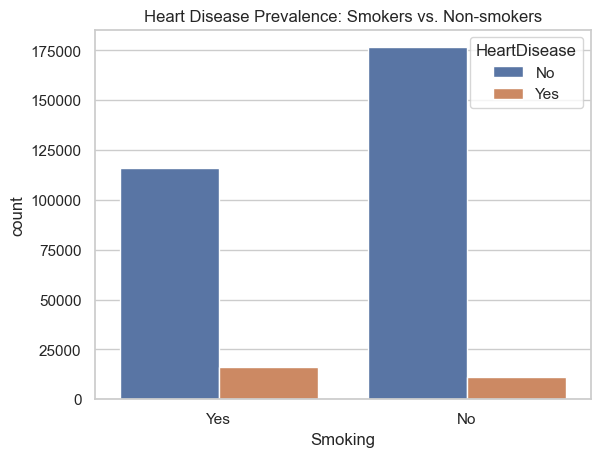

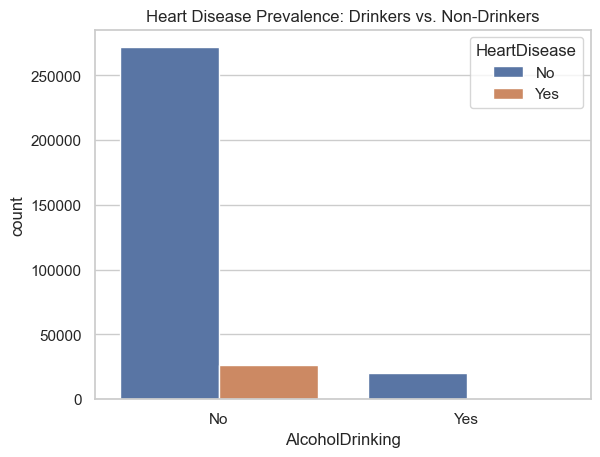

In [291]:
# Comparing heart disease prevalence among smokers vs. non-smokers
sns.countplot(x='Smoking', hue='HeartDisease', data=df)
plt.title('Heart Disease Prevalence: Smokers vs. Non-smokers')
plt.show()

# Comparing heart disease prevalence based on alcohol drinking habits
sns.countplot(x='AlcoholDrinking', hue='HeartDisease', data=df)
plt.title('Heart Disease Prevalence: Drinkers vs. Non-Drinkers')
plt.show()

# Business Question 3
# --------------------------------------------------------
# Demographic Disparities: Age, Gender, and Race
# --------------------------------------------------------

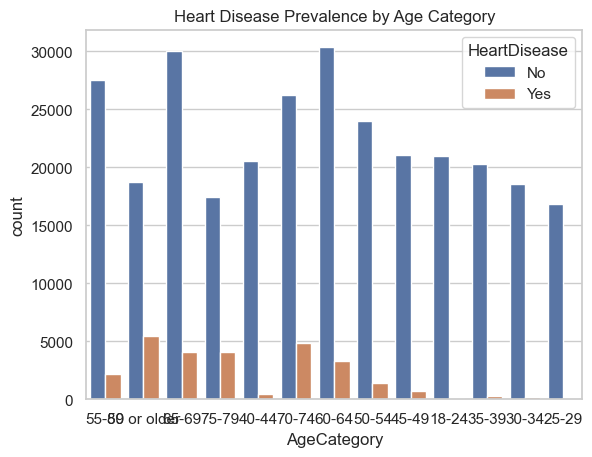

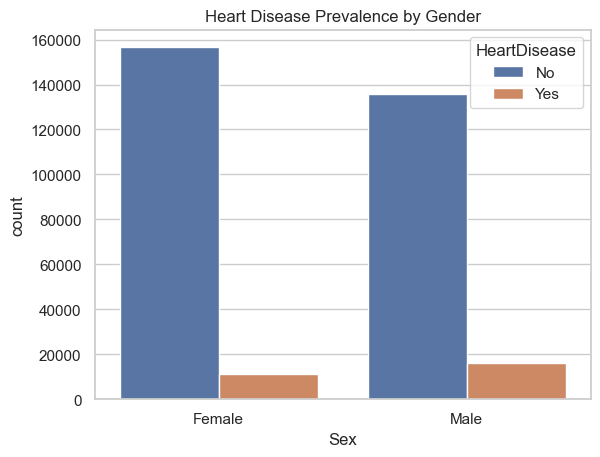

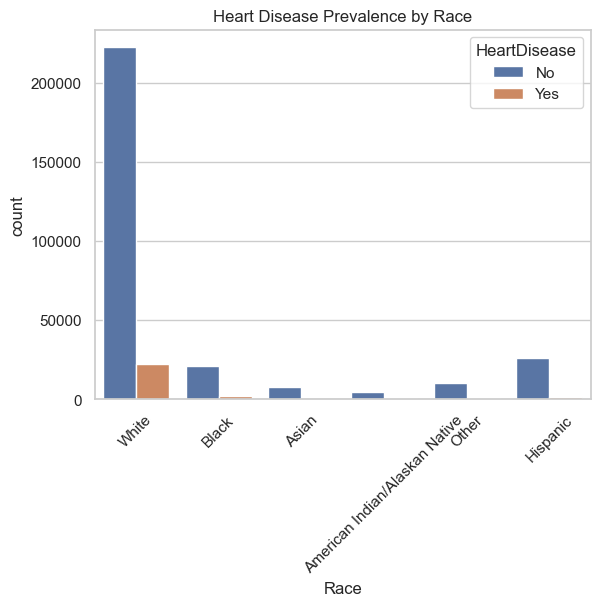

In [292]:
# Heart disease prevalence across different age categories
sns.countplot(x='AgeCategory', hue='HeartDisease', data=df)
plt.title('Heart Disease Prevalence by Age Category')
plt.show()

# Heart disease prevalence by gender
sns.countplot(x='Sex', hue='HeartDisease', data=df)
plt.title('Heart Disease Prevalence by Gender')
plt.show()

# Heart disease prevalence by race/ethnicity
sns.countplot(x='Race', hue='HeartDisease', data=df)
plt.xticks(rotation=45)
plt.title('Heart Disease Prevalence by Race')
plt.show()

# Business Question 4
# --------------------------------------------------------
# Mental and Physical Health Link
# --------------------------------------------------------

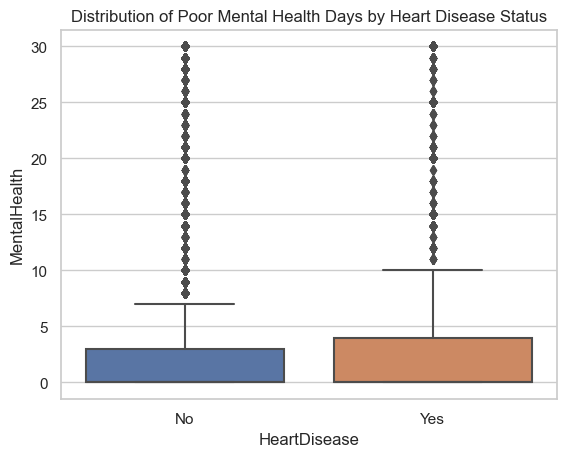

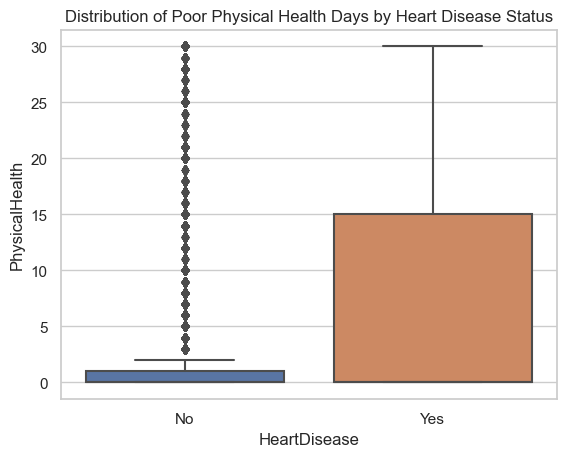

In [293]:
# Correlation between mental health days and heart disease
sns.boxplot(x='HeartDisease', y='MentalHealth', data=df)
plt.title('Distribution of Poor Mental Health Days by Heart Disease Status')
plt.show()

# Correlation between physical health days and heart disease
sns.boxplot(x='HeartDisease', y='PhysicalHealth', data=df)
plt.title('Distribution of Poor Physical Health Days by Heart Disease Status')
plt.show()

# Business Question 5
# --------------------------------------------------------
# Lifestyle and Health: Physical Activity & Sleep
# --------------------------------------------------------

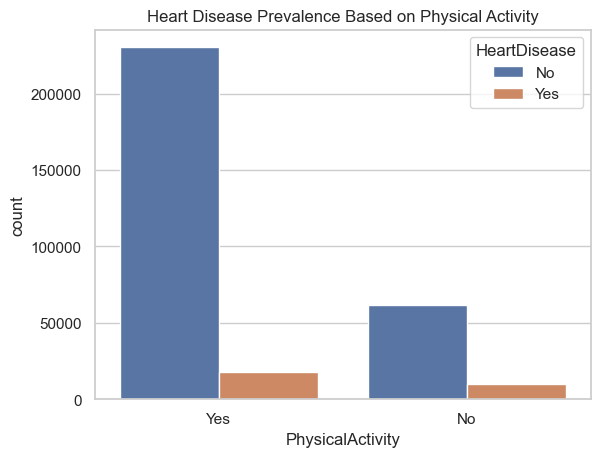

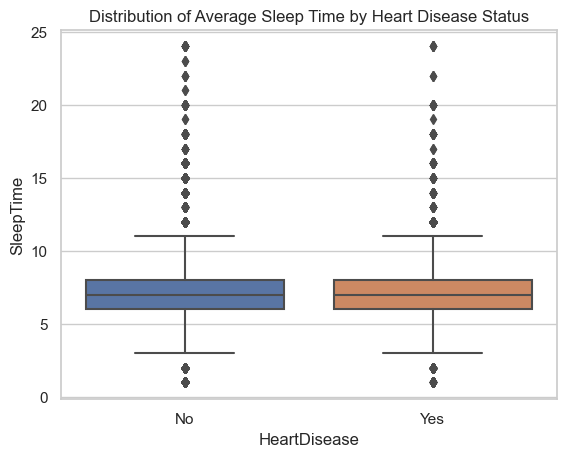

In [294]:
# Heart disease prevalence based on physical activity
sns.countplot(x='PhysicalActivity', hue='HeartDisease', data=df)
plt.title('Heart Disease Prevalence Based on Physical Activity')
plt.show()

# Distribution of sleep time by heart disease status
sns.boxplot(x='HeartDisease', y='SleepTime', data=df)
plt.title('Distribution of Average Sleep Time by Heart Disease Status')
plt.show()

# Business Question 6
# --------------------------------------------------------
# Co-existing Health Conditions
# --------------------------------------------------------

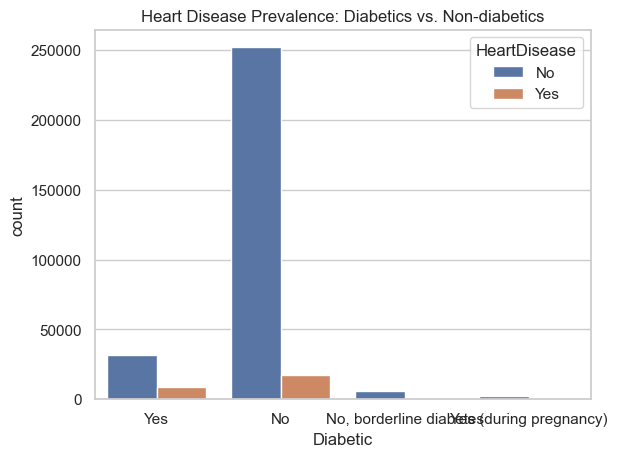

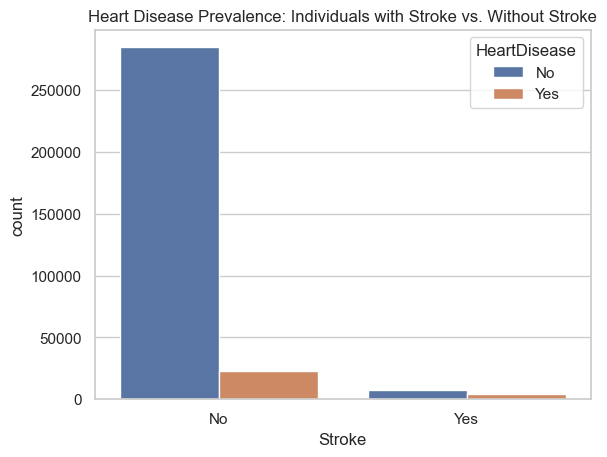

In [295]:
# Heart disease prevalence among diabetics vs. non-diabetics
sns.countplot(x='Diabetic', hue='HeartDisease', data=df)
plt.title('Heart Disease Prevalence: Diabetics vs. Non-diabetics')
plt.show()

# Heart disease prevalence among those who had a stroke vs. those who didn't
sns.countplot(x='Stroke', hue='HeartDisease', data=df)
plt.title('Heart Disease Prevalence: Individuals with Stroke vs. Without Stroke')
plt.show()

# Business Question 7
# --------------------------------------------------------
# Health Perception and Reality
# --------------------------------------------------------

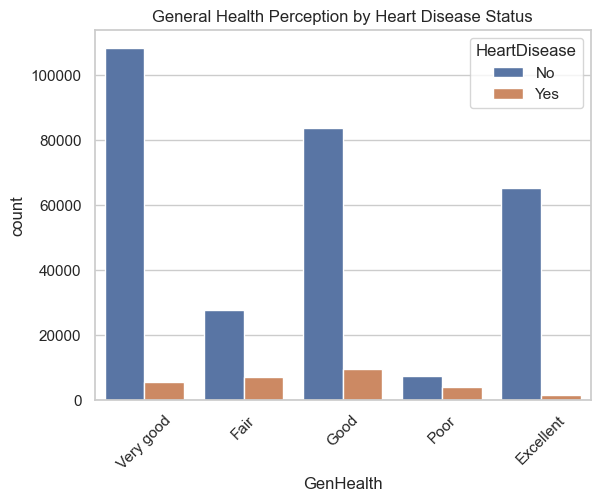

In [296]:
# Comparing general health perception among those with and without heart disease
sns.countplot(x='GenHealth', hue='HeartDisease', data=df)
plt.title('General Health Perception by Heart Disease Status')
plt.xticks(rotation=45)
plt.show()

# Business Question 8
# --------------------------------------------------------
# Mobility and Heart Disease
# --------------------------------------------------------

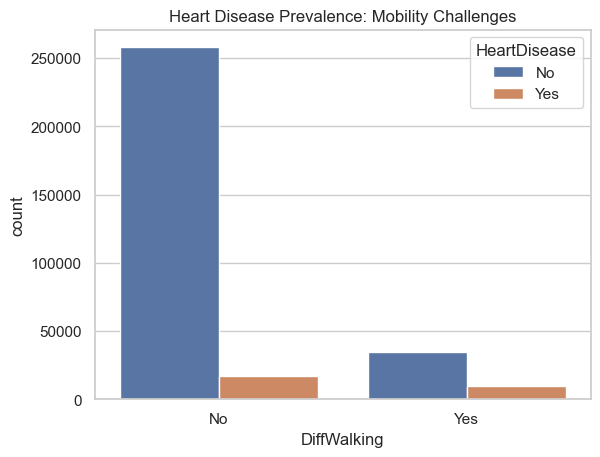

In [297]:
# Heart disease prevalence among those with and without walking difficulties
sns.countplot(x='DiffWalking', hue='HeartDisease', data=df)
plt.title('Heart Disease Prevalence: Mobility Challenges')
plt.show()

# Business Question 9
# --------------------------------------------------------
# Cancer and Heart Disease Link
# --------------------------------------------------------

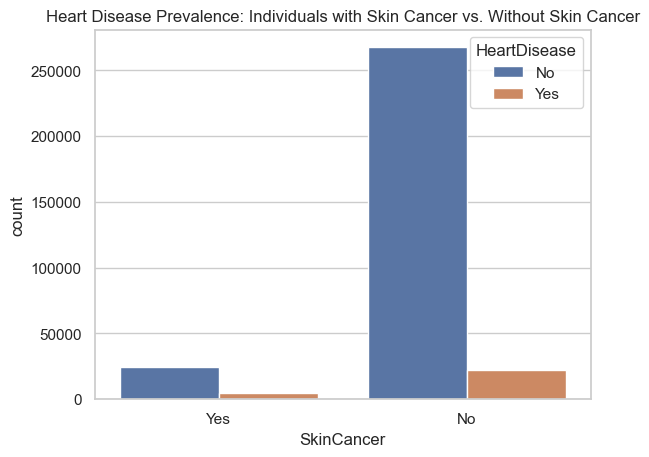

In [298]:
# Heart disease prevalence among those who had skin cancer vs. those who didn't
sns.countplot(x='SkinCancer', hue='HeartDisease', data=df)
plt.title('Heart Disease Prevalence: Individuals with Skin Cancer vs. Without Skin Cancer')
plt.show()

# What is the risk of getting Heart Disease if you are exposed to more than 1 factor?

In [299]:
dk = df.copy()
dk.Smoking = dk.Smoking.apply(lambda x : 'Smoking' if x == 'Yes' else 'Non Smoking')
dk.Stroke = dk.Stroke.apply(lambda x : 'Stroke' if x == 'Yes' else 'No Stroke')
dk.PhysicalActivity = dk.PhysicalActivity.apply(lambda x : 'Active' if x == 'Yes' else 'Inactive')
dk.Diabetic = dk.Diabetic.apply(lambda x : 'Diabetic' if x == 'Yes' else 'No Diabetic')
dk.KidneyDisease = dk.KidneyDisease.apply(lambda x : 'KidneyDisease' if x == 'Yes' else 'No KidneyDisease')

In [300]:
dk['group'] = dk.Smoking + ' & ' + dk.Stroke + ' & ' + dk.PhysicalActivity + ' & ' + dk.Diabetic + ' & ' + dk.KidneyDisease

In [301]:
df_plot = dk.groupby('group')['HeartDisease'].value_counts(normalize = True).mul(100)
df_plot = df_plot.rename('percent').reset_index()

In [302]:
h = df_plot[df_plot['HeartDisease']=='Yes'].drop(['HeartDisease'],axis=1)
h.set_index('group',inplace=True)
k = h.iloc[[8, 12, 14, 24, 28, 29, 30, 3, 1, 2, 11, 19]]
k

,percent
group,
Non Smoking & Stroke & Active & Diabetic & KidneyDisease,56.626506
Non Smoking & Stroke & Inactive & Diabetic & KidneyDisease,56.687898
Non Smoking & Stroke & Inactive & No Diabetic & KidneyDisease,52.755906
Smoking & Stroke & Active & Diabetic & KidneyDisease,58.918919
Smoking & Stroke & Inactive & Diabetic & KidneyDisease,64.197531
Smoking & Stroke & Inactive & Diabetic & No KidneyDisease,53.992395
Smoking & Stroke & Inactive & No Diabetic & KidneyDisease,55.172414
Non Smoking & No Stroke & Active & No Diabetic & No KidneyDisease,3.519108
Non Smoking & No Stroke & Active & Diabetic & No KidneyDisease,11.808529


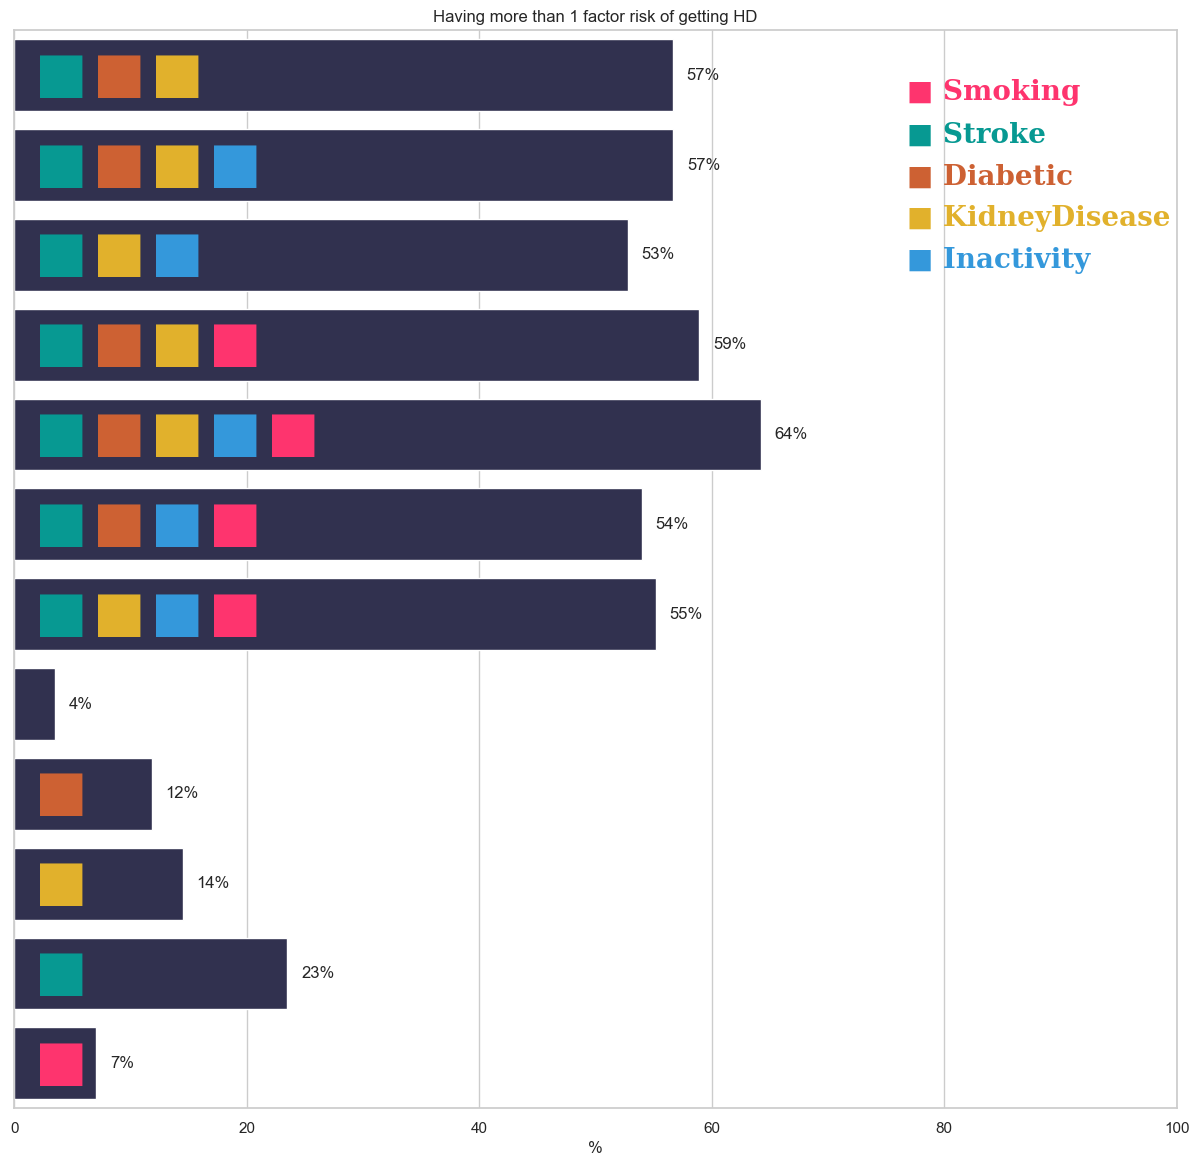

In [303]:
fig, ax = plt.subplots(1, 1,figsize =(15, 14))
ax = sns.barplot(y = k.index, x=k.percent.values, color='#2c2c54')
ax.bar_label(ax.containers[0], fmt='%.f%%', padding=10)
colors={
    'smoking':'#fe346e',
    'stroke':'#079992',
    'diabetic':'#cd6133',
    'kidney':'#e1b12c',
    'active':'#3498db'
}
y=0
axes=[
    ['stroke', 'diabetic', 'kidney'],
    ['stroke', 'diabetic', 'kidney','active'],
    ['stroke', 'kidney','active'],
    ['stroke', 'diabetic', 'kidney','smoking'],
    ['stroke', 'diabetic', 'kidney', 'active', 'smoking'],
    ['stroke', 'diabetic', 'active', 'smoking'],
    ['stroke', 'kidney', 'active', 'smoking'],
    [],
    ['diabetic'],
    ['kidney'],
    ['stroke'],
    ['smoking']
]
for axo in axes:
    x=4
    for i in axo:
        ax.annotate('■',
                    ha='center', va='center', fontsize=40, color=colors[i], xy=(x, y),font='Serif')
        x+=5
    y+=1
ax.set_xlabel('%')
ax.axes.get_yaxis().set_visible(False)
ax.set(xlim=(0, 100))

fig.text(0.72,0.83, '■ Smoking', {'font': 'Serif','weight':'bold','size': '20','weight':'bold','style':'normal', 'color':colors['smoking']})
fig.text(0.72,0.8, '■ Stroke', {'font': 'Serif','weight':'bold','size': '20','weight':'bold','style':'normal', 'color':colors['stroke']})
fig.text(0.72,0.77, '■ Diabetic', {'font': 'Serif','weight':'bold','size': '20','weight':'bold','style':'normal', 'color':colors['diabetic']})
fig.text(0.72,0.74, '■ KidneyDisease', {'font': 'Serif','weight':'bold','size': '20','weight':'bold','style':'normal', 'color':colors['kidney']})
fig.text(0.72,0.71, '■ Inactivity', {'font': 'Serif','weight':'bold','size': '20','weight':'bold','style':'normal', 'color':colors['active']})
ax.set_title('Having more than 1 factor risk of getting HD')
plt.show()

# Model Exploration - Part 2C

# Changing values(yes,no)into numeric values 0,1

In [304]:
df['AgeCategory'] = df['AgeCategory'].str[:2]

In [305]:
df=df.replace('No','0')
df= df.replace('Yes','1')
df=df.replace('Female','0')
df= df.replace('Male','1')
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,55,White,1,1,Very good,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,80,White,0,1,Very good,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,65,White,1,1,Fair,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,75,White,0,0,Good,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,40,White,0,1,Very good,8.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,27.41,1,0,0,7.0,0.0,1,1,60,Hispanic,1,0,Fair,6.0,1,0,0
319791,0,29.84,1,0,0,0.0,0.0,0,1,35,Hispanic,0,1,Very good,5.0,1,0,0
319792,0,24.24,0,0,0,0.0,0.0,0,0,45,Hispanic,0,1,Good,6.0,0,0,0
319793,0,32.81,0,0,0,0.0,0.0,0,0,25,Hispanic,0,0,Good,12.0,0,0,0


# changing general health into numeric values

In [306]:
df['GenHealth']=df['GenHealth'].replace('Poor','0')
df['GenHealth']=df['GenHealth'].replace('Fair','1')
df['GenHealth']=df['GenHealth'].replace('Good','2')
df['GenHealth']=df['GenHealth'].replace('Very good','3')
df['GenHealth']=df['GenHealth'].replace('Excellent','4')

In [307]:
df["Diabetic"]=df['Diabetic'].replace('No, borderline diabetes','3')
df["Diabetic"]=df['Diabetic'].replace('Yes (during pregnancy)','4')

In [308]:
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,55,White,1,1,3,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,80,White,0,1,3,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,65,White,1,1,1,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,75,White,0,0,2,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,40,White,0,1,3,8.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,27.41,1,0,0,7.0,0.0,1,1,60,Hispanic,1,0,1,6.0,1,0,0
319791,0,29.84,1,0,0,0.0,0.0,0,1,35,Hispanic,0,1,3,5.0,1,0,0
319792,0,24.24,0,0,0,0.0,0.0,0,0,45,Hispanic,0,1,2,6.0,0,0,0
319793,0,32.81,0,0,0,0.0,0.0,0,0,25,Hispanic,0,0,2,12.0,0,0,0


In [309]:
x = df.drop(['HeartDisease','Race'],axis = 1)

In [310]:
y = df['HeartDisease']

In [311]:
x

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,16.60,1,0,0,3.0,30.0,0,0,55,1,1,3,5.0,1,0,1
1,20.34,0,0,1,0.0,0.0,0,0,80,0,1,3,7.0,0,0,0
2,26.58,1,0,0,20.0,30.0,0,1,65,1,1,1,8.0,1,0,0
3,24.21,0,0,0,0.0,0.0,0,0,75,0,0,2,6.0,0,0,1
4,23.71,0,0,0,28.0,0.0,1,0,40,0,1,3,8.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,27.41,1,0,0,7.0,0.0,1,1,60,1,0,1,6.0,1,0,0
319791,29.84,1,0,0,0.0,0.0,0,1,35,0,1,3,5.0,1,0,0
319792,24.24,0,0,0,0.0,0.0,0,0,45,0,1,2,6.0,0,0,0
319793,32.81,0,0,0,0.0,0.0,0,0,25,0,0,2,12.0,0,0,0


In [312]:
x.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   BMI               319795 non-null  float64
 1   Smoking           319795 non-null  object 
 2   AlcoholDrinking   319795 non-null  object 
 3   Stroke            319795 non-null  object 
 4   PhysicalHealth    319795 non-null  float64
 5   MentalHealth      319795 non-null  float64
 6   DiffWalking       319795 non-null  object 
 7   Sex               319795 non-null  object 
 8   AgeCategory       319795 non-null  object 
 9   Diabetic          319795 non-null  object 
 10  PhysicalActivity  319795 non-null  object 
 11  GenHealth         319795 non-null  object 
 12  SleepTime         319795 non-null  float64
 13  Asthma            319795 non-null  object 
 14  KidneyDisease     319795 non-null  object 
 15  SkinCancer        319795 non-null  object 
dtypes: float64(4), objec

In [313]:
x=x.astype('float32')


In [314]:
x.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   BMI               319795 non-null  float32
 1   Smoking           319795 non-null  float32
 2   AlcoholDrinking   319795 non-null  float32
 3   Stroke            319795 non-null  float32
 4   PhysicalHealth    319795 non-null  float32
 5   MentalHealth      319795 non-null  float32
 6   DiffWalking       319795 non-null  float32
 7   Sex               319795 non-null  float32
 8   AgeCategory       319795 non-null  float32
 9   Diabetic          319795 non-null  float32
 10  PhysicalActivity  319795 non-null  float32
 11  GenHealth         319795 non-null  float32
 12  SleepTime         319795 non-null  float32
 13  Asthma            319795 non-null  float32
 14  KidneyDisease     319795 non-null  float32
 15  SkinCancer        319795 non-null  float32
dtypes: float32(16)
memor

In [315]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=5)

In [316]:
y.value_counts()


0    292422
1     27373
Name: HeartDisease, dtype: int64

<AxesSubplot:ylabel='HeartDisease'>

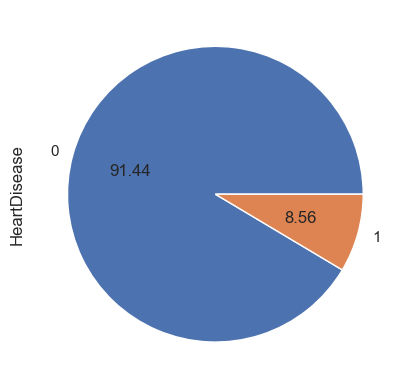

In [317]:
 y.value_counts().plot.pie(autopct = '%0.2f')


# 1. Prediction with imbalanced data

In [318]:
# Placeholders for accuracy values
decision_tree_accuracy_imbalanced = None
logistic_regression_accuracy_imbalanced = None
random_forest_accuracy_imbalanced = None
decision_tree_accuracy_balanced_under = None
logistic_regression_accuracy_balanced_under = None
random_forest_accuracy_balanced_under = None
decision_tree_accuracy_balanced_over = None
logistic_regression_accuracy_balanced_over = None
random_forest_accuracy_balanced_over = None

# Placeholders for recall values
decision_tree_recall_imbalanced = None
logistic_regression_recall_imbalanced = None
random_forest_recall_imbalanced = None
decision_tree_recall_balanced_under = None
logistic_regression_recall_balanced_under = None
random_forest_recall_balanced_under = None
decision_tree_recall_balanced_over = None
logistic_regression_recall_balanced_over = None
random_forest_recall_balanced_over = None

In [319]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score, KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Placeholders for recall values
decision_tree_recall_imbalanced = None
logistic_regression_recall_imbalanced = None
random_forest_recall_imbalanced = None
decision_tree_recall_balanced_under = None
logistic_regression_recall_balanced_under = None
random_forest_recall_balanced_under = None
decision_tree_recall_balanced_over = None
logistic_regression_recall_balanced_over = None
random_forest_recall_balanced_over = None


## 1.1 Decision Tree Classifier

In [320]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=5, max_features=4)
dt.fit(x_train, y_train)
dt.score(x_train, y_train)
decision_tree_accuracy_imbalanced = dt.score(x_test, y_test)
y_pred = dt.predict(x_test)



## Decision Tree Model Evaluation with imbalanced data

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     58497
           1       0.52      0.04      0.08      5462

    accuracy                           0.91     63959
   macro avg       0.72      0.52      0.52     63959
weighted avg       0.88      0.91      0.88     63959



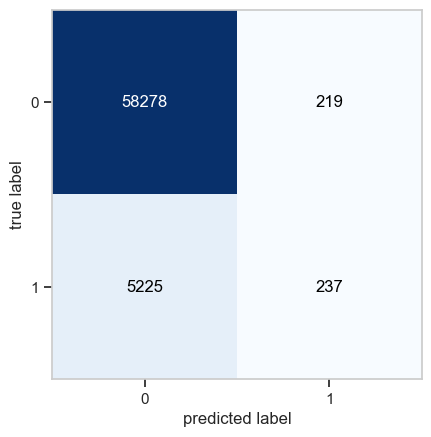

In [321]:
con = confusion_matrix(y_test, y_pred)
con
plot_confusion_matrix(con)
print(classification_report(y_test, y_pred))
decision_tree_recall_imbalanced = classification_report(y_test, y_pred, output_dict=True)['1']['recall']

# Decision Tree - cross validation

In [322]:

K_fold = KFold(n_splits=3, shuffle=True, random_state=42)
scoring = "accuracy"
score = cross_val_score(dt, x, y, cv=K_fold, scoring=scoring)
print(score)
round(np.mean(score) * 100, 2)

[0.91366711 0.91506407 0.91536427]


91.47

---

## 1.2 Logistic regression

In [323]:
from sklearn.linear_model import LogisticRegression

LOG = LogisticRegression().fit(x_train, y_train)

LOG.score(x_train, y_train)

logistic_regression_accuracy_imbalanced = LOG.score(x_test, y_test)

y_pred = LOG.predict(x_test)


/Users/rony/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Logistic regression Model Evaluation with imbalanced data

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     58497
           1       0.50      0.14      0.21      5462

    accuracy                           0.91     63959
   macro avg       0.71      0.56      0.58     63959
weighted avg       0.89      0.91      0.89     63959



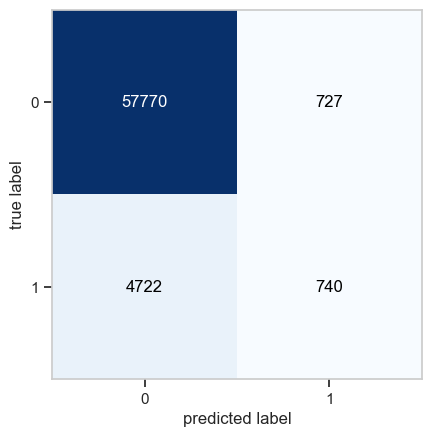

In [324]:

con = confusion_matrix(y_test, y_pred)
con
plot_confusion_matrix(con)

print(classification_report(y_test, y_pred))
logistic_regression_recall_imbalanced = classification_report(y_test, y_pred, output_dict=True)['1']['recall']

## Logistic regression - cross validation

In [325]:

K_fold = KFold(n_splits=3, shuffle=True, random_state=42)
scoring = "accuracy"
score = cross_val_score(LOG, x, y, cv=K_fold, scoring=scoring)
print(score)

round(np.mean(score) * 100, 2)

/Users/rony/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/rony/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logisti

[0.91407987 0.91527046 0.91601156]


/Users/rony/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


91.51

---


## 1.3 Random Forest Classifier

In [326]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=4, max_depth=3, max_features=4)

rf.fit(x_train, y_train)

rf.score(x_train, y_train)

random_forest_accuracy_imbalanced = rf.score(x_test, y_test)

y_pred = rf.predict(x_test)

# Random Forest Classifier Model Evaluation with imbalanced data

/Users/rony/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/rony/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/rony/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.91      1.00      0.96     58497
           1       0.00      0.00      0.00      5462

    accuracy                           0.91     63959
   macro avg       0.46      0.50      0.48     63959
weighted avg       0.84      0.91      0.87     63959



/Users/rony/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/rony/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/rony/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


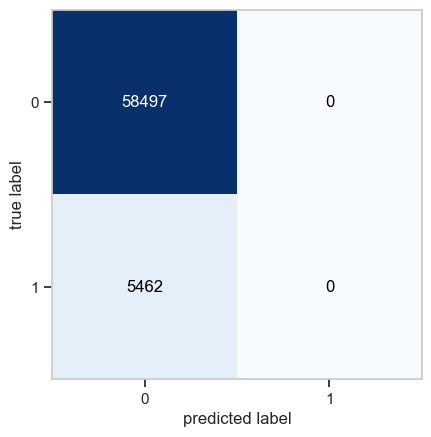

In [327]:

con = confusion_matrix(y_test, y_pred)
con
plot_confusion_matrix(con)

print(classification_report(y_test, y_pred))
random_forest_recall_imbalanced = classification_report(y_test, y_pred, output_dict=True)['1']['recall']

# Random Forest Classifier - Cross validation

In [328]:

K_fold = KFold(n_splits=3, shuffle=True, random_state=42)
scoring = "accuracy"
score = cross_val_score(rf, x, y, cv=K_fold, scoring=scoring)
print(score)
round(np.mean(score) * 100, 2)

[0.91344196 0.91457626 0.91519541]


91.44

---

# 2. Prediction with balanced data
### Addressing the issue of imbalanced datasets using random under-sampling

In [329]:
# Importing necessary libraries
!pip install imblearn
from imblearn.under_sampling import RandomUnderSampler

In [330]:
# Initializing RandomUnderSampler
RUS = RandomUnderSampler(sampling_strategy=1)

In [331]:
# Performing under-sampling on the training data
x_res , y_res = RUS.fit_resample(x_train,y_train)

<AxesSubplot:ylabel='HeartDisease'>

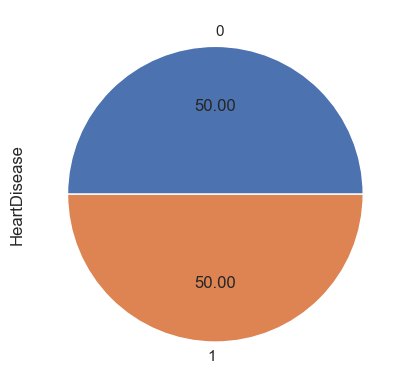

In [332]:
# Visualizing the class distribution using a pie chart
y_res.value_counts().plot.pie(autopct='%.2f')

In [333]:
# Displaying the value counts of the resampled target variable
y_res.value_counts()

0    21911
1    21911
Name: HeartDisease, dtype: int64

In [334]:
# Displaying the resampled feature data
x_res

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
121993,49.340000,1.0,0.0,0.0,3.0,5.0,0.0,0.0,40.0,1.0,1.0,1.0,7.0,1.0,0.0,0.0
93608,23.400000,1.0,0.0,0.0,0.0,15.0,0.0,0.0,18.0,0.0,1.0,3.0,7.0,1.0,0.0,0.0
311701,21.459999,0.0,0.0,0.0,1.0,3.0,0.0,1.0,45.0,0.0,1.0,3.0,6.0,0.0,0.0,0.0
124750,22.680000,1.0,0.0,0.0,3.0,0.0,0.0,0.0,70.0,0.0,1.0,3.0,9.0,0.0,0.0,1.0
33382,24.750000,0.0,0.0,0.0,25.0,0.0,1.0,0.0,80.0,0.0,0.0,3.0,5.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189650,18.650000,1.0,0.0,0.0,8.0,0.0,1.0,1.0,60.0,0.0,0.0,1.0,12.0,0.0,0.0,0.0
209121,30.540001,1.0,0.0,0.0,6.0,0.0,0.0,1.0,75.0,0.0,0.0,2.0,9.0,0.0,0.0,0.0
54746,31.750000,0.0,0.0,0.0,0.0,30.0,1.0,0.0,75.0,1.0,1.0,2.0,8.0,0.0,0.0,0.0
86407,30.270000,0.0,0.0,0.0,14.0,0.0,0.0,1.0,70.0,0.0,1.0,2.0,7.0,0.0,0.0,0.0


# 2.1 Decision tree classifier

In [335]:
from sklearn.tree import DecisionTreeClassifier

In [336]:
dt = DecisionTreeClassifier(max_depth = 5 , max_features= 4)

In [337]:
dt.fit(x_res,y_res)

DecisionTreeClassifier(max_depth=5, max_features=4)

In [338]:
dt.score(x_res,y_res)

0.7421158322303866

In [339]:
decision_tree_accuracy_balanced_under = dt.score(x_test,y_test)

In [340]:
y_pred = dt.predict(x_test)

## Decision Tree Model Evaluation with Random Under-Sampled data

In [341]:
con = confusion_matrix(y_test , y_pred)
con

array([[38625, 19872],
       [  891,  4571]])

(<Figure size 640x480 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

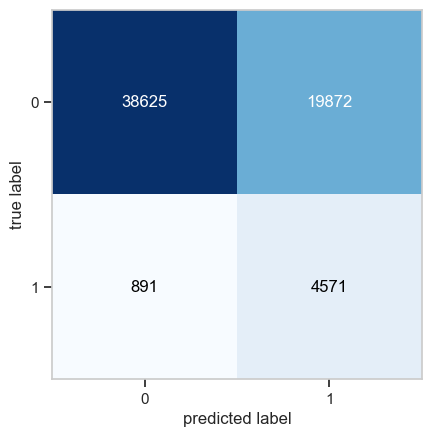

In [342]:
plot_confusion_matrix(con )

In [343]:
print (classification_report(y_test , y_pred))
decision_tree_recall_balanced_under = classification_report(y_test, y_pred, output_dict=True)['1']['recall']


              precision    recall  f1-score   support

           0       0.98      0.66      0.79     58497
           1       0.19      0.84      0.31      5462

    accuracy                           0.68     63959
   macro avg       0.58      0.75      0.55     63959
weighted avg       0.91      0.68      0.75     63959



## Cross validation of Decision Tree

In [344]:
K_fold = KFold(n_splits= 3 , shuffle  = True ,random_state= 42)
scoring = "accuracy"
score = cross_val_score(dt , x,y , cv = K_fold , scoring= scoring)
print (score)

[0.91360144 0.91561755 0.91590837]


In [345]:
round(np.mean(score)*100 , 2)


91.5

# 2.2 Logistic Regression classifier

In [346]:
from sklearn.linear_model import LogisticRegression

LOG = LogisticRegression().fit(x_res, y_res)

LOG.score(x_res, y_res)

logistic_regression_accuracy_balanced_under = LOG.score(x_test, y_test)

y_pred = LOG.predict(x_test)

/Users/rony/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Logistic Regression Model Evaluation with Random Under-Sampled data

              precision    recall  f1-score   support

           0       0.97      0.75      0.85     58497
           1       0.22      0.78      0.35      5462

    accuracy                           0.75     63959
   macro avg       0.60      0.76      0.60     63959
weighted avg       0.91      0.75      0.80     63959



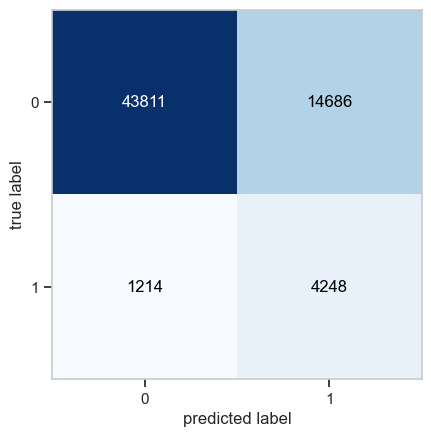

In [347]:
con = confusion_matrix(y_test, y_pred)
con
plot_confusion_matrix(con)

print(classification_report(y_test, y_pred))
logistic_regression_recall_balanced_under = classification_report(y_test, y_pred, output_dict=True)['1']['recall']

## Logistic Regression - Cross validation

In [348]:
K_fold = KFold(n_splits=3, shuffle=True, random_state=42)
scoring = "accuracy"
score = cross_val_score(LOG, x, y, cv=K_fold, scoring=scoring)
print(score)

round(np.mean(score) * 100, 2)

/Users/rony/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/rony/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logisti

[0.91407987 0.91527046 0.91601156]


/Users/rony/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


91.51

---

# 2.3 Random Forest classifier

In [349]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=4, max_depth=3, max_features=4)

rf.fit(x_res, y_res)

rf.score(x_res, y_res)

random_forest_accuracy_balanced_under = rf.score(x_test, y_test)

y_pred = rf.predict(x_test)


## Random Forest Classifier Model Evaluation with Random Under-Sampled data

              precision    recall  f1-score   support

           0       0.97      0.73      0.84     58497
           1       0.21      0.76      0.33      5462

    accuracy                           0.74     63959
   macro avg       0.59      0.75      0.58     63959
weighted avg       0.91      0.74      0.79     63959



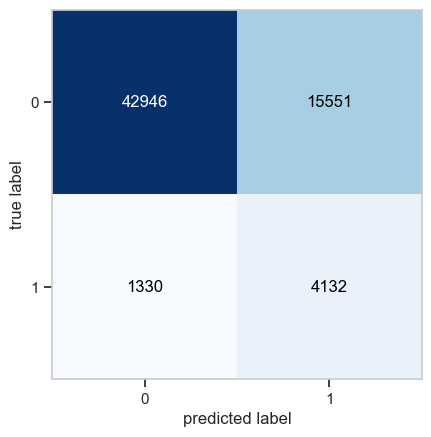

In [350]:
con = confusion_matrix(y_test, y_pred)
con
plot_confusion_matrix(con)

print(classification_report(y_test, y_pred))
random_forest_recall_balanced_under = classification_report(y_test, y_pred, output_dict=True)['1']['recall']

## Cross validation of Random Forest Classifier

In [351]:
K_fold = KFold(n_splits=3, shuffle=True, random_state=42)
scoring = "accuracy"
score = cross_val_score(rf, x, y, cv=K_fold, scoring=scoring)
print(score)
round(np.mean(score) * 100, 2)

[0.91344196 0.91457626 0.91528922]


91.44

# 3. Prediction with balanced data
### Addressing the issue of imbalanced datasets using Random Over-Sampling Technique

In [352]:
from imblearn.over_sampling import RandomOverSampler

In [353]:
ROS = RandomOverSampler(sampling_strategy = 1)

In [354]:
x_res, y_res = ROS.fit_resample(x_train,y_train)

<AxesSubplot:ylabel='HeartDisease'>

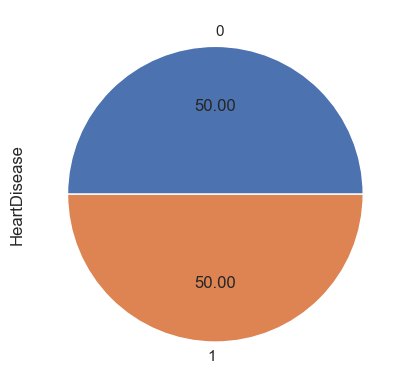

In [355]:
y_res.value_counts().plot.pie(autopct = "%.2f")


In [356]:
y_res.value_counts()


0    233925
1    233925
Name: HeartDisease, dtype: int64

# 3.1 Decision tree classifier

In [357]:

from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=5, max_features=4)
dt.fit(x_res, y_res)
dt.score(x_res, y_res)
decision_tree_accuracy_balanced_over = dt.score(x_test, y_test)
y_pred = dt.predict(x_test)

## Decision Tree Model Evaluation with Random Over-Sampled data

              precision    recall  f1-score   support

           0       0.97      0.62      0.76     58497
           1       0.17      0.83      0.28      5462

    accuracy                           0.63     63959
   macro avg       0.57      0.72      0.52     63959
weighted avg       0.91      0.63      0.71     63959



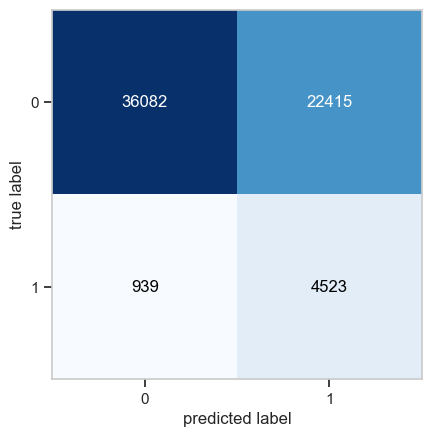

In [358]:
## Decision Tree Model Evaluation with Random Under-sampled data
con = confusion_matrix(y_test, y_pred)
con
plot_confusion_matrix(con)
print(classification_report(y_test, y_pred))

decision_tree_recall_balanced_over = classification_report(y_test, y_pred, output_dict=True)['1']['recall']


## Cross validation of Decision Tree Model

In [359]:
## Cross validation of Decision Tree
K_fold = KFold(n_splits=3, shuffle=True, random_state=42)
scoring = "accuracy"
score = cross_val_score(dt, x, y, cv=K_fold, scoring=scoring)
print(score)
round(np.mean(score) * 100, 2)

[0.91420182 0.91574889 0.9158427 ]


91.53

---

# 3.2 Logistic Regression classifier


In [360]:
# 3.2 Logistic Regression classifier
from sklearn.linear_model import LogisticRegression

LOG = LogisticRegression().fit(x_res, y_res)

LOG.score(x_res, y_res)

logistic_regression_accuracy_balanced_over = LOG.score(x_test, y_test)

y_pred = LOG.predict(x_test)

/Users/rony/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Logistic Regression Model Evaluation with Random Over-Sampled data


              precision    recall  f1-score   support

           0       0.97      0.74      0.84     58497
           1       0.22      0.78      0.35      5462

    accuracy                           0.75     63959
   macro avg       0.60      0.76      0.59     63959
weighted avg       0.91      0.75      0.80     63959



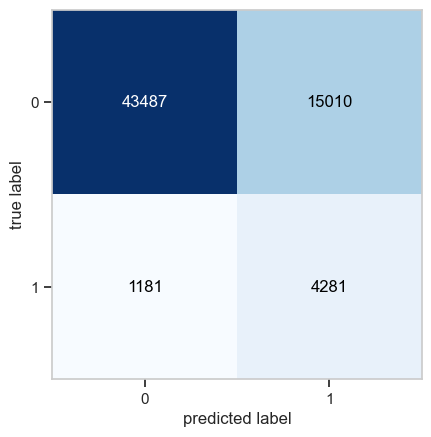

In [361]:

con = confusion_matrix(y_test, y_pred)
con
plot_confusion_matrix(con)

print(classification_report(y_test, y_pred))
logistic_regression_recall_balanced_over = classification_report(y_test, y_pred, output_dict=True)['1']['recall']


## Cross validation of Logistic Regression Model

In [362]:

K_fold = KFold(n_splits=3, shuffle=True, random_state=42)
scoring = "accuracy"
score = cross_val_score(LOG, x, y, cv=K_fold, scoring=scoring)
print(score)

round(np.mean(score) * 100, 2)


/Users/rony/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/rony/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logisti

[0.91407987 0.91527046 0.91601156]


/Users/rony/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


91.51

# 3.3 Random Forest classifier

In [363]:

# 3.3 Random Forest classifier
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=4, max_depth=3, max_features=4)

rf.fit(x_res, y_res)

rf.score(x_res, y_res)

random_forest_accuracy_balanced_over = rf.score(x_test, y_test)

y_pred = rf.predict(x_test)

## Random Forest Classifier Model Evaluation with Random Over-Sampled data


              precision    recall  f1-score   support

           0       0.97      0.72      0.83     58497
           1       0.20      0.76      0.32      5462

    accuracy                           0.72     63959
   macro avg       0.59      0.74      0.57     63959
weighted avg       0.90      0.72      0.78     63959



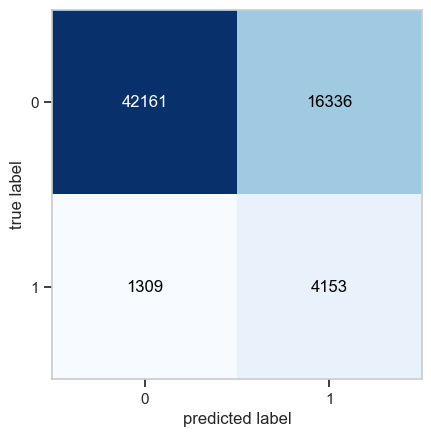

In [364]:

con = confusion_matrix(y_test, y_pred)
con
plot_confusion_matrix(con)

print(classification_report(y_test, y_pred))
random_forest_recall_balanced_over = classification_report(y_test, y_pred, output_dict=True)['1']['recall']

## Cross validation of Random Forest Classifier

In [365]:

K_fold = KFold(n_splits=3, shuffle=True, random_state=42)
scoring = "accuracy"
score = cross_val_score(rf, x, y, cv=K_fold, scoring=scoring)
print(score)
round(np.mean(score) * 100, 2)

[0.91344196 0.91457626 0.91519541]


91.44

---

# Performance Evaluation

In [366]:
import pandas as pd

# Creating a dictionary for the data
data = {
    'Model': ['Decision Tree', 'Logistic Regression', 'Random Forest'],
    'Imbalanced Accuracy': [decision_tree_accuracy_imbalanced, logistic_regression_accuracy_imbalanced, random_forest_accuracy_imbalanced],
    'Balanced (Under) Accuracy': [decision_tree_accuracy_balanced_under, logistic_regression_accuracy_balanced_under, random_forest_accuracy_balanced_under],
    'Balanced (Over) Accuracy': [decision_tree_accuracy_balanced_over, logistic_regression_accuracy_balanced_over, random_forest_accuracy_balanced_over],
    'Imbalanced Recall': [decision_tree_recall_imbalanced, logistic_regression_recall_imbalanced, random_forest_recall_imbalanced],
    'Balanced (Under) Recall': [decision_tree_recall_balanced_under, logistic_regression_recall_balanced_under, random_forest_recall_balanced_under],
    'Balanced (Over) Recall': [decision_tree_recall_balanced_over, logistic_regression_recall_balanced_over, random_forest_recall_balanced_over]
}

# Creating pandas DataFrames
accuracy_df = pd.DataFrame(data, columns=['Model', 'Imbalanced Accuracy', 'Balanced (Under) Accuracy', 'Balanced (Over) Accuracy'])
recall_df = pd.DataFrame(data, columns=['Model', 'Imbalanced Recall', 'Balanced (Under) Recall', 'Balanced (Over) Recall'])

# Displaying the tables
print("Accuracy Table:")
print(accuracy_df)
print("\n\n")
print("Recall Table:")
print(recall_df)


Accuracy Table:
                 Model  Imbalanced Accuracy  Balanced (Under) Accuracy  \
0        Decision Tree             0.914883                   0.675370   
1  Logistic Regression             0.914805                   0.751403   
2        Random Forest             0.914602                   0.736065   

   Balanced (Over) Accuracy  
0                  0.634860  
1                  0.746853  
2                  0.724120  



Recall Table:
                 Model  Imbalanced Recall  Balanced (Under) Recall  \
0        Decision Tree           0.043391                 0.836873   
1  Logistic Regression           0.135482                 0.777737   
2        Random Forest           0.000000                 0.756499   

   Balanced (Over) Recall  
0                0.828085  
1                0.783779  
2                0.760344  


# Visualising the performance Based on Accuracy

In [367]:
# Define a function for visualizing the performance
def visualize_performance(title, data_labels, values, xlabel, ylabel):
    plt.figure(figsize=(8, 6))
    sns.barplot(x=data_labels, y=values)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

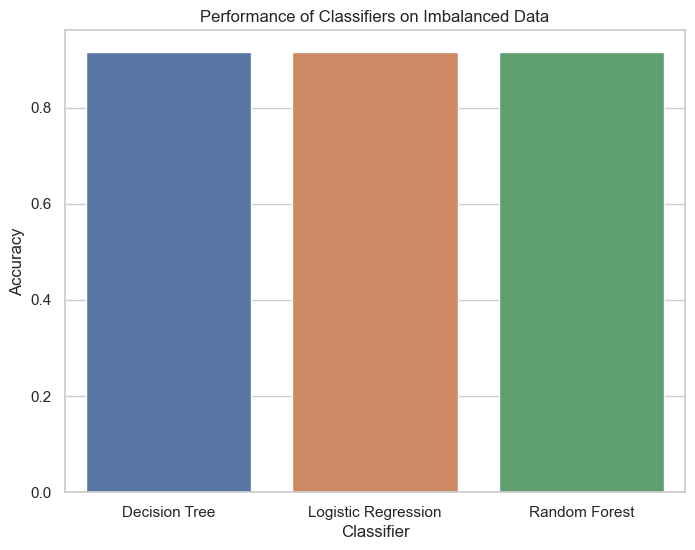

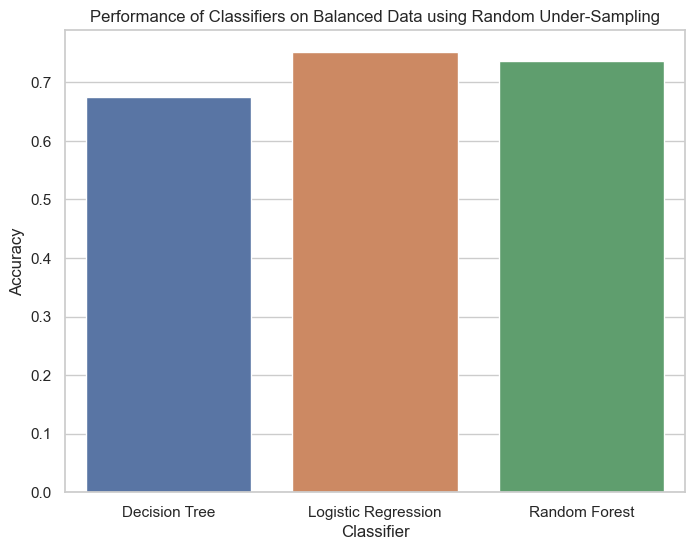

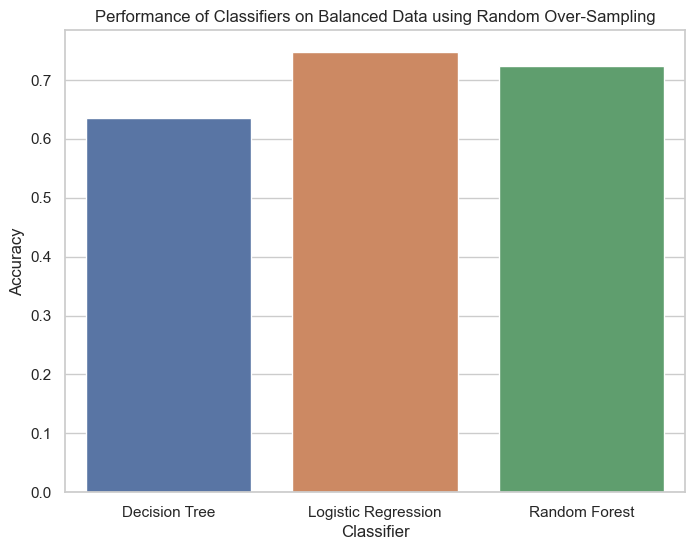

In [368]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizing the performance of the classifiers
imbalanced_data_labels = ['Decision Tree', 'Logistic Regression', 'Random Forest']
imbalanced_values = [decision_tree_accuracy_imbalanced, logistic_regression_accuracy_imbalanced, random_forest_accuracy_imbalanced]
visualize_performance("Performance of Classifiers on Imbalanced Data", imbalanced_data_labels, imbalanced_values, "Classifier", "Accuracy")

balanced_under_sampling_data_labels = ['Decision Tree', 'Logistic Regression', 'Random Forest']
balanced_under_sampling_values = [decision_tree_accuracy_balanced_under, logistic_regression_accuracy_balanced_under, random_forest_accuracy_balanced_under]
visualize_performance("Performance of Classifiers on Balanced Data using Random Under-Sampling", balanced_under_sampling_data_labels, balanced_under_sampling_values, "Classifier", "Accuracy")

balanced_over_sampling_data_labels = ['Decision Tree', 'Logistic Regression', 'Random Forest']
balanced_over_sampling_values = [decision_tree_accuracy_balanced_over, logistic_regression_accuracy_balanced_over, random_forest_accuracy_balanced_over]
visualize_performance("Performance of Classifiers on Balanced Data using Random Over-Sampling", balanced_over_sampling_data_labels, balanced_over_sampling_values, "Classifier", "Accuracy")


---

# Visualising the performance Based on Recall Value

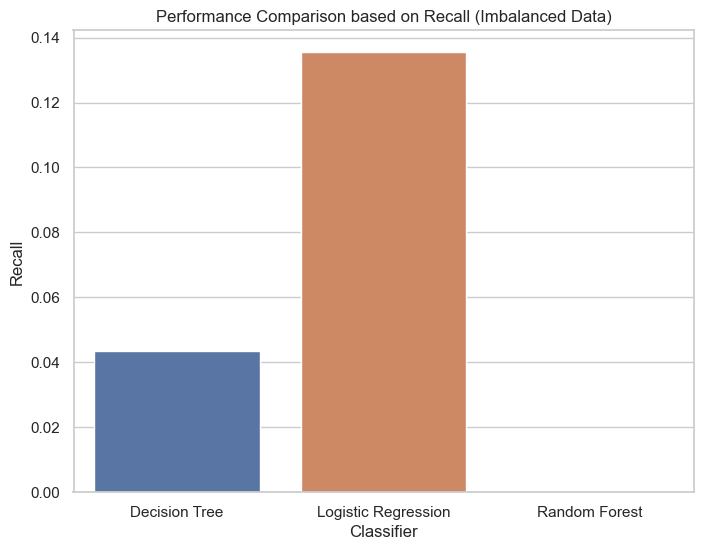

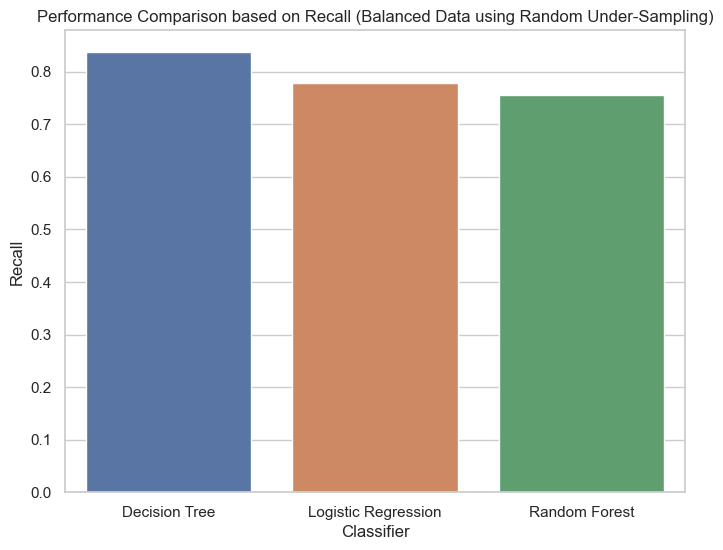

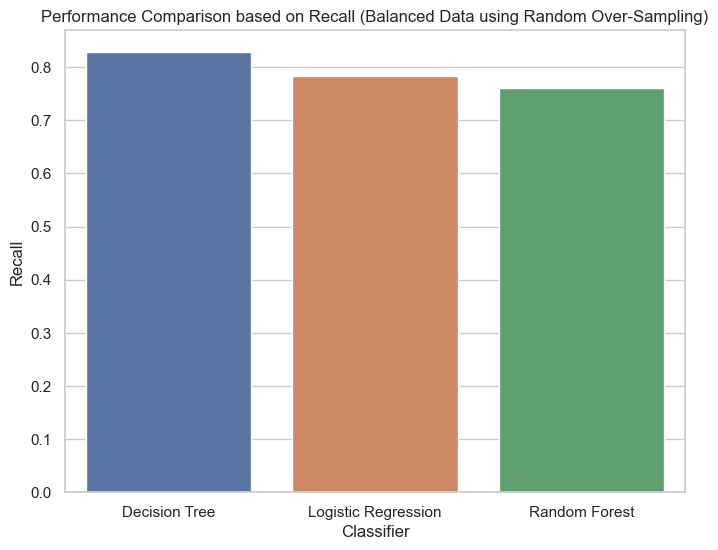

In [369]:

# Define a function for visualizing the performance based on recall
def visualize_recall_performance(title, data_labels, values, xlabel, ylabel):
    plt.figure(figsize=(8, 6))
    sns.barplot(x=data_labels, y=values)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

# Visualizing the performance of the classifiers based on recall
imbalanced_data_labels = ['Decision Tree', 'Logistic Regression', 'Random Forest']
imbalanced_values = [decision_tree_recall_imbalanced, logistic_regression_recall_imbalanced, random_forest_recall_imbalanced]
visualize_recall_performance("Performance Comparison based on Recall (Imbalanced Data)", imbalanced_data_labels, imbalanced_values, "Classifier", "Recall")

balanced_under_sampling_data_labels = ['Decision Tree', 'Logistic Regression', 'Random Forest']
balanced_under_sampling_values = [decision_tree_recall_balanced_under, logistic_regression_recall_balanced_under, random_forest_recall_balanced_under]
visualize_recall_performance("Performance Comparison based on Recall (Balanced Data using Random Under-Sampling)", balanced_under_sampling_data_labels, balanced_under_sampling_values, "Classifier", "Recall")

balanced_over_sampling_data_labels = ['Decision Tree', 'Logistic Regression', 'Random Forest']
balanced_over_sampling_values = [decision_tree_recall_balanced_over, logistic_regression_recall_balanced_over, random_forest_recall_balanced_over]
visualize_recall_performance("Performance Comparison based on Recall (Balanced Data using Random Over-Sampling)", balanced_over_sampling_data_labels, balanced_over_sampling_values, "Classifier", "Recall")